### Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

 

### Business Goal 

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

 

### Data Preparation

There is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. You need to consider only company name as the independent variable for model building. 
 

### Model Evaluation:

When you're done with model building and residual analysis, and have made predictions on the test set, just make sure you use the following two lines of code to calculate the R-squared score on the test set.

In [1]:
import os as os
os.chdir("C:/Users/aishwarya.kuzhikkat/Downloads/Upgrad-Housing")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
carprice= pd.read_csv("CarPrice_Assignment.csv")

#### Steps Performed
 * Check if linear relationship exists between price and any of the variables inorder to build a model
 * Data Cleaning  <br>
    -Missing value treatment ( if present) <br>
    -Removing duplicates     (if present)  <br>
    -Addressing data quality issues  <br>
    -Converting variables into their respective types- if not present <br>
    -Reporting outliers for each of the numeric variables <br>
    -Visualization of categorical variables to determine relation with price
 * Data Preparation <br>
    -Deriving new features from the existing one <br>
    -Converting categorical variables to dummies<br>
    -Data split into test and train <br>
    -Scaling of train dataset <br>
 * Model building on train set <br>
    -Dividing into x and y variables <br>
    -Fitting Linear model and checking p-values, adj. R squared <br>
    -Recursive Feature elimination to choose important variables <br>
    -Manual tuning checking p-value and VIF to achieve final model <br>
 * Residual analysis to check if the model built follows Linear regression assumptions <br>
 * Model evaluation on test set <br>
    -Scaling test set <br>
    -Ensure variables in train and test set are same before fitting model on test set <br>
    -Fit model built on train set to test set <br>
    -Check r2_score to understand variance explained <br>
 * Observations <br>
 * Model Summary explanation <br>
 * Price Equation ( scaled value)
 * Suggestions for the company Geely Auto <br>


In [3]:
carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [5]:
carprice.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000



Data Exploration
To perform linear regression, the (numeric) target variable should be linearly related to at least one another numeric variable. Let's see whether that's true in this case.

We'll first subset the list of all (independent) numeric variables, and then make a pairwise plot.

In [6]:
#Let's check the variables which are categoric
carprice_categoric= carprice.select_dtypes(include=['object'])
carprice_categoric.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [7]:
# Now including only numeric variables as numeric variables can only be used in linear regression
carprice_numeric= carprice.select_dtypes(include=['float64','int64'])
carprice_numeric.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


<Figure size 7200x3600 with 0 Axes>

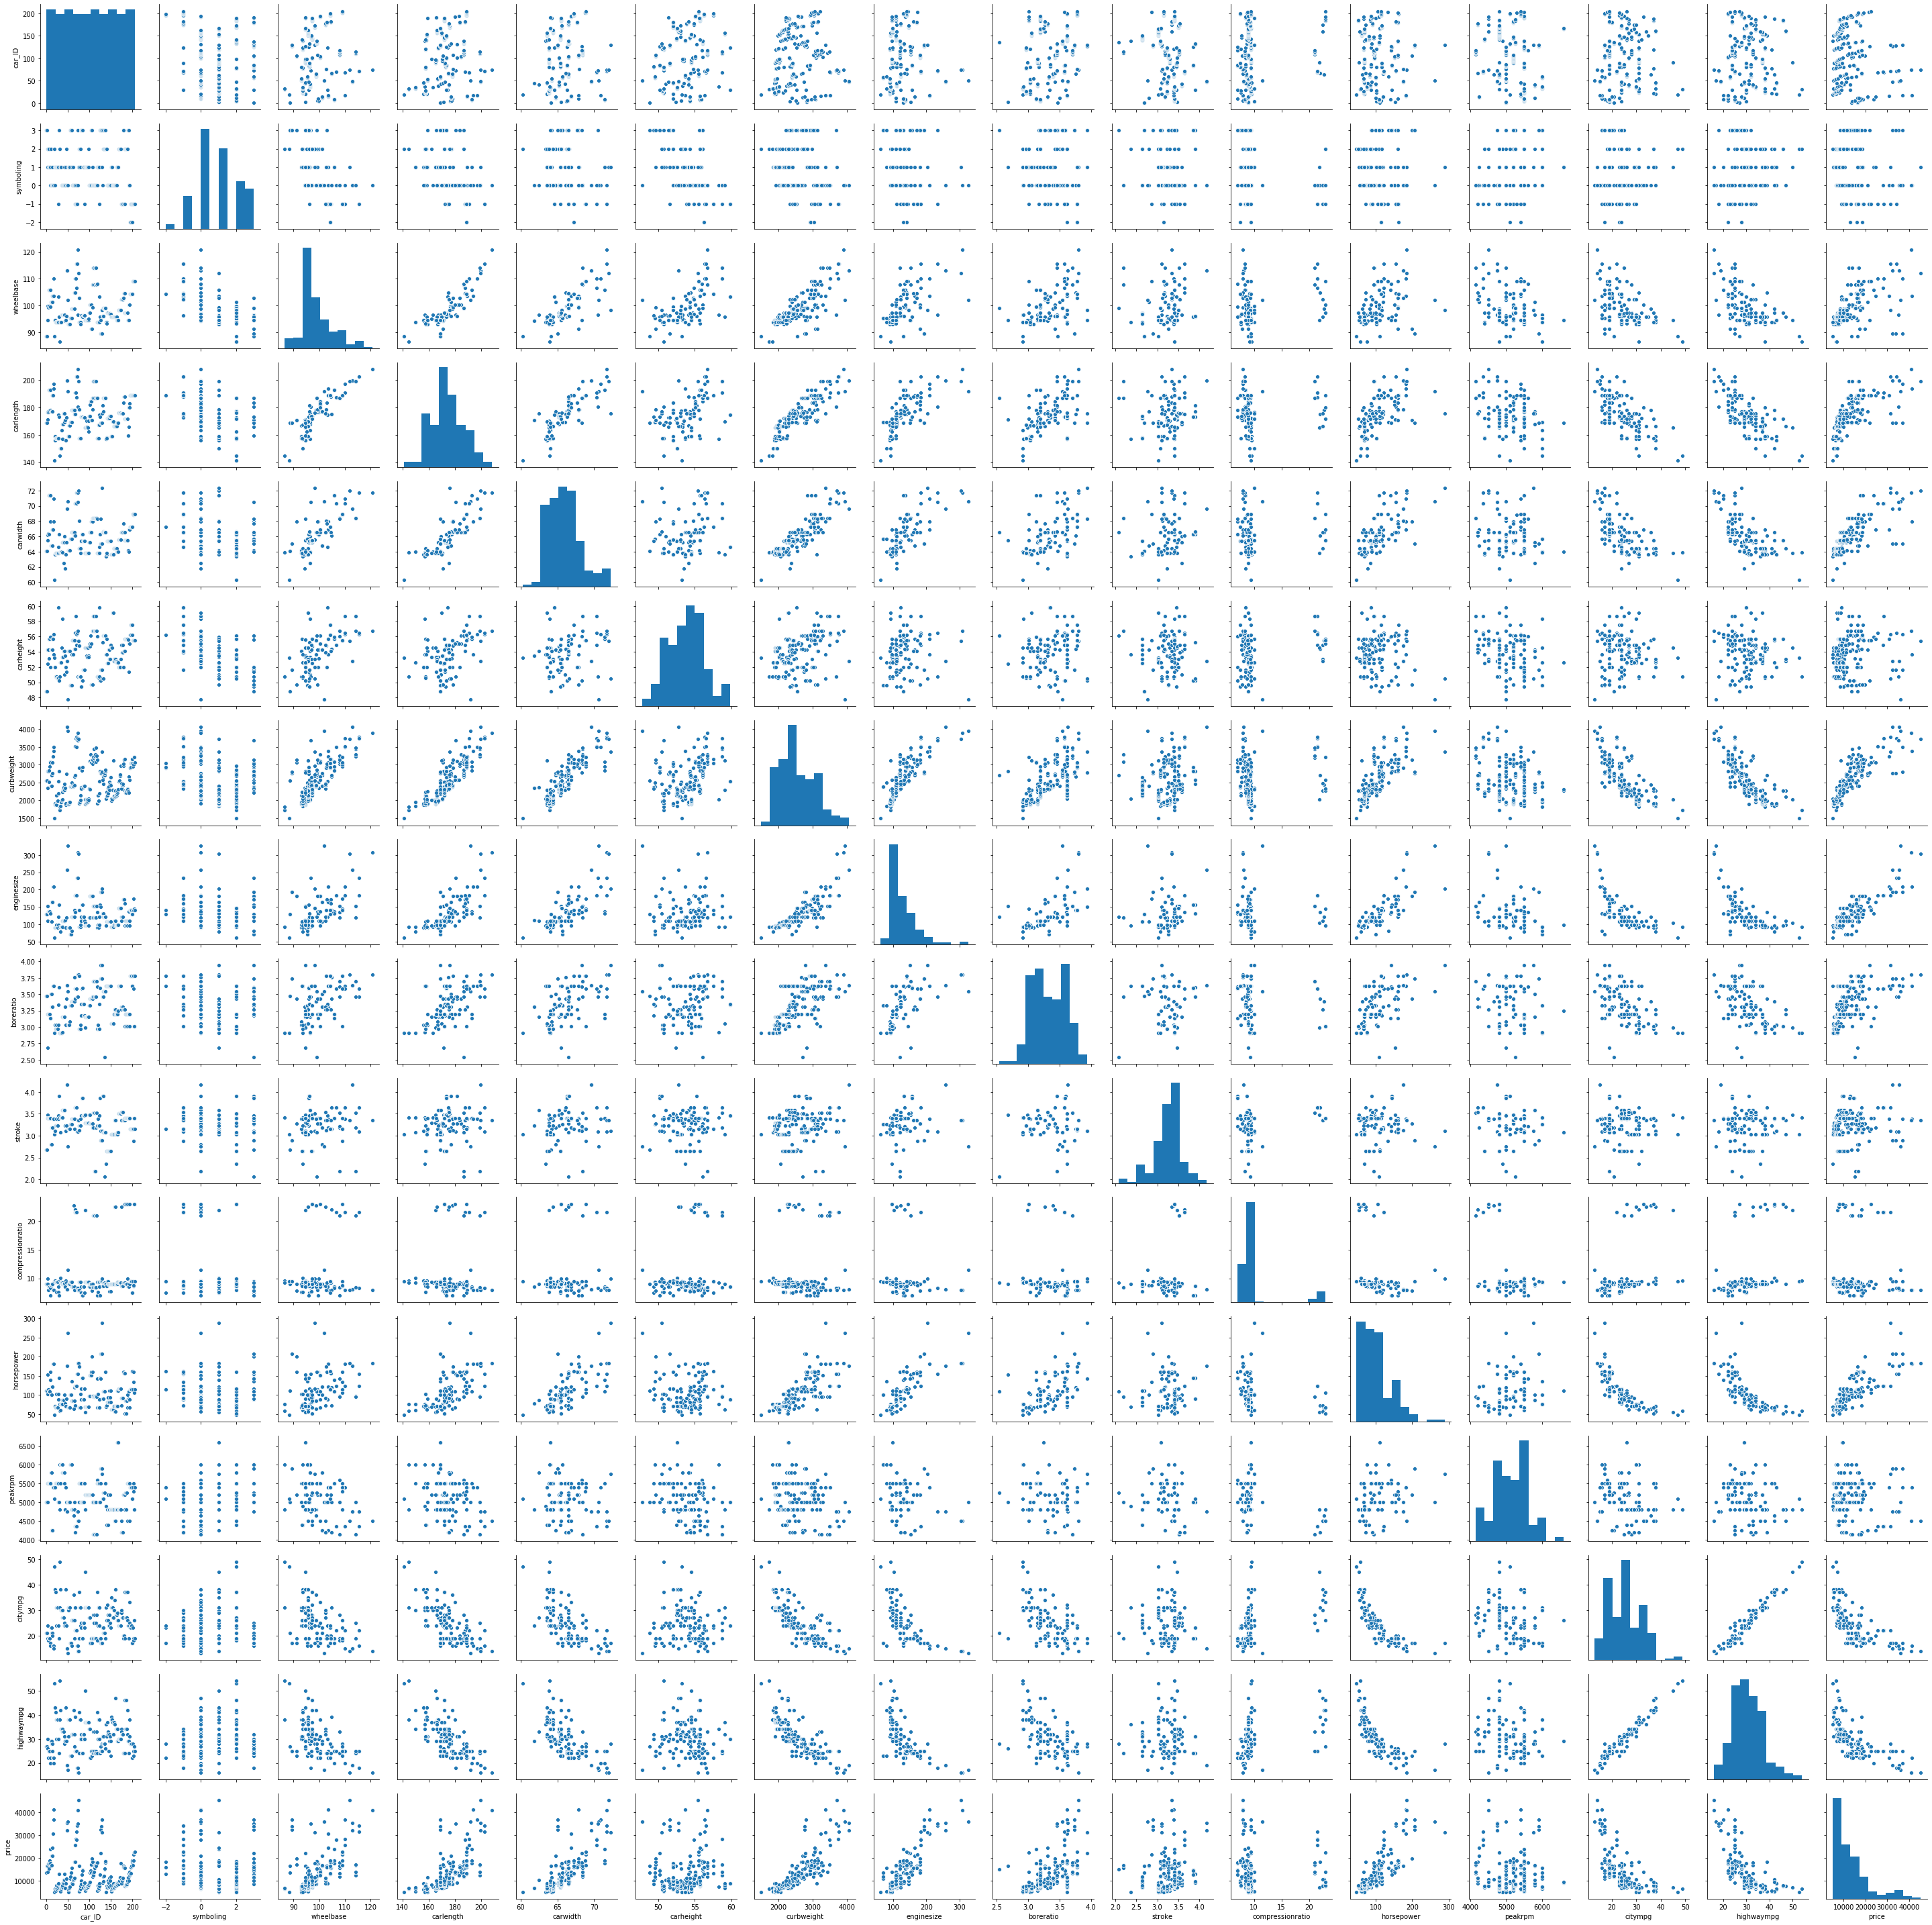

In [8]:
#Plotting pairwise plot
plt.figure(figsize=(100,50))
sns.pairplot(carprice_numeric)
plt.show()

Zooming the pairplot at the last row/column, we can observe these from the scatter plots
 1. The variables carlength, carwidth,curbweight,enginesize, horsepower seem to have a positive correlation with price
 2. The variables citympg and highwaympg show a negative correlation
 
This can be clearer if we plot the heatmap and look at the correlation coefficients

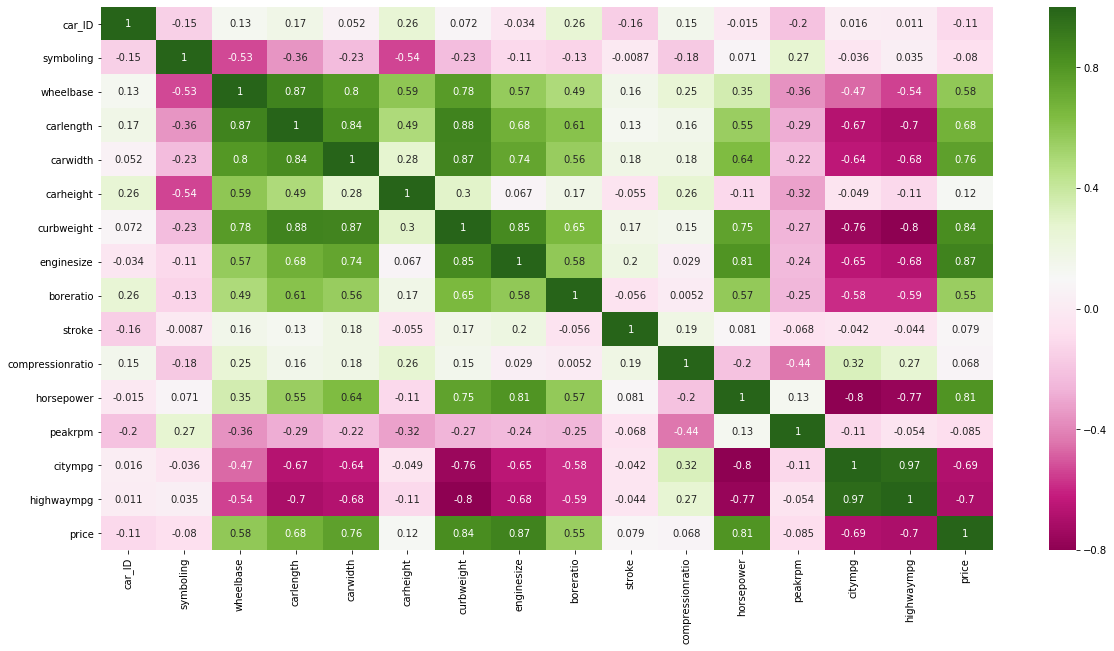

In [9]:
#Plotting a heatmap
correlation = carprice_numeric.corr()
plt.figure(figsize=(20,10))
sns.heatmap(correlation,cmap="PiYG",annot=True)
plt.show()

The heatmap obtained above confirms our observations from the pairplot that carlength, carwidth,curbweight,enginesize, horsepower  and wheelbase( with 0.58) have a positive correlation with the price and citympg, highwaympg have negative correlation.

This suggests that high mileage cars might be lacking in other major aspects, and these cars might be sold for the sole purpose of higher mileage at a lower price.

One more interesting fact we observe is that many independent variables have a strong correlation with each other
For example: carlength with curbweight, carlength with wheelbase, horsepower with enginesize, etc;
So, before building the model,it should be treated for multicollinearity inorder to obtain accurate results.

However, from these graphs above, we've come to a conclusion that a linear regression model can be built between price and the other independent  variables.


## Data Cleaning 

In [10]:
#From carprice.info(), we understood that there are no missing values in the dataset. So we don't have to carry out the step of
#treating for missing values. Now let's check for duplicates
carprice.loc[carprice.duplicated()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


As we can see, there are no duplicate rows in the data set and all of them are unique. So there's no need to remove any row from the dataset

Next checking the column "CarName"

In [11]:
carprice["CarName"]

0                alfa-romero giulia
1               alfa-romero stelvio
2          alfa-romero Quadrifoglio
3                       audi 100 ls
4                        audi 100ls
5                          audi fox
6                        audi 100ls
7                         audi 5000
8                         audi 4000
9               audi 5000s (diesel)
10                         bmw 320i
11                         bmw 320i
12                           bmw x1
13                           bmw x3
14                           bmw z4
15                           bmw x4
16                           bmw x5
17                           bmw x3
18                 chevrolet impala
19            chevrolet monte carlo
20              chevrolet vega 2300
21                    dodge rampage
22              dodge challenger se
23                       dodge d200
24                dodge monaco (sw)
25               dodge colt hardtop
26                  dodge colt (sw)
27             dodge coronet

The first half before the space represents the car company and after the space is the model of the car. 
For building the model, we will only consider the company as required in the problem statement

In [12]:
#Splitting the first column
carprice['CompanyName'] = carprice['CarName'].apply(lambda x : x.split(' ')[0])
#Adding a new column companyname and dropping the existing Car Name column
carprice.drop(['CarName'],axis=1,inplace=True)
carprice['CompanyName'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
volvo          11
peugeot        11
volkswagen      9
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         4
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
vw              2
maxda           2
porcshce        1
mercury         1
Nissan          1
vokswagen       1
toyouta         1
Name: CompanyName, dtype: int64

We can see that certain names are misspelt when they are actually the same car names in other format. Like vw, porcshce, etc;
So, let's correct it and address the quality issue

maxda = mazda <br>
nissan = Nissan <br>
porcsche = porsche <br>
toyouta = toyota <br>
vokswagen = vw=volkswagen <br>

In [13]:
#Let's define a function to replace the wrong names with the right ones
carprice. CompanyName=carprice.CompanyName.str.lower()
def replace_name(x,y):
    carprice.CompanyName.replace(x,y,inplace=True)

# Now replacing the incorrect names
replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')
#Let's check the unique values
carprice.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [14]:
carprice['CompanyName'].value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
chevrolet       3
jaguar          3
alfa-romero     3
renault         2
mercury         1
Name: CompanyName, dtype: int64

The data quality issue is now solved. Next let's convert the symboling to an ordered categorical variable as Python considers it as numerical.

In [15]:
carprice['symboling']=carprice['symboling'].astype('object')

### Outlier treatment for numeric variables

### PRICE

Outliers might affect our predictions on the price after building a model. 
But as the data is limited to 205 rows, removing outliers and lowering the size of data might cause overfit once we build the model and the accuracy decrease. 
So, let's just report the outliers here


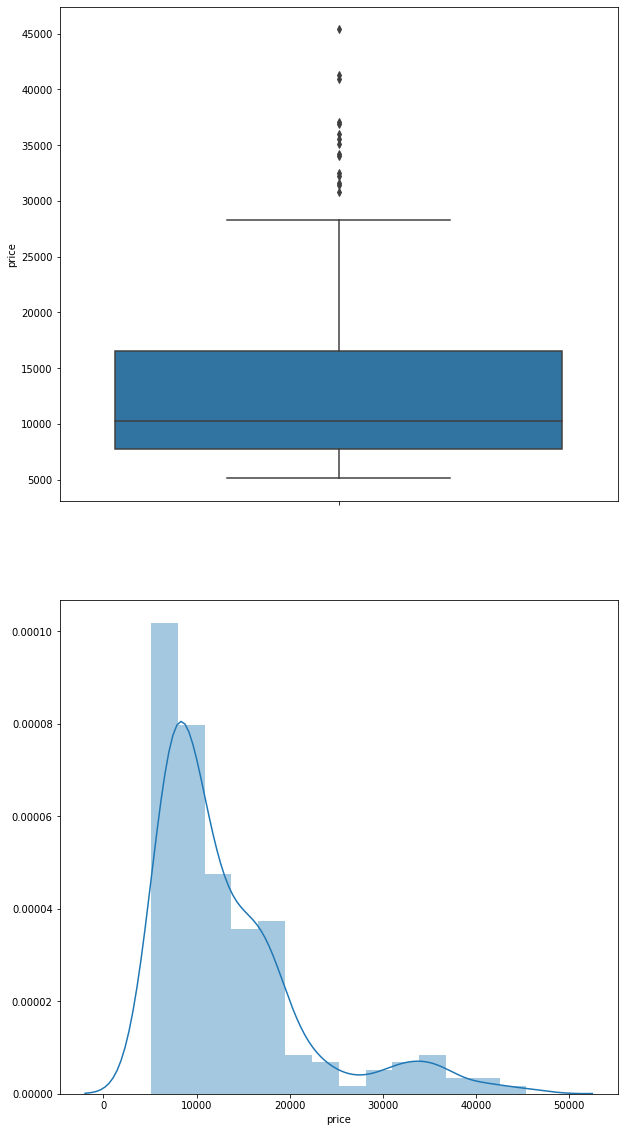

In [16]:
#Let's look at the column price
plt.figure(figsize=(10,20))
plt.subplot(2,1,1)
sns.boxplot(carprice['price'],orient="v")
plt.subplot(2,1,2)
sns.distplot(carprice['price'])

In [17]:

def report_outlier_values(col_name):
    global carprice
    q1 = carprice[col_name].quantile(0.25)
    q3 = carprice[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    low  = q1-1.5*iqr
    high = q3+1.5*iqr
    number = carprice.loc[-((carprice[col_name] > low) & (carprice[col_name] < high))][col_name]
    return number


In [18]:
report_outlier_values('price')

15     30760.0
16     41315.0
17     36880.0
47     32250.0
48     35550.0
49     36000.0
70     31600.0
71     34184.0
72     35056.0
73     40960.0
74     45400.0
126    32528.0
127    34028.0
128    37028.0
129    31400.5
Name: price, dtype: float64

### WHEELBASE

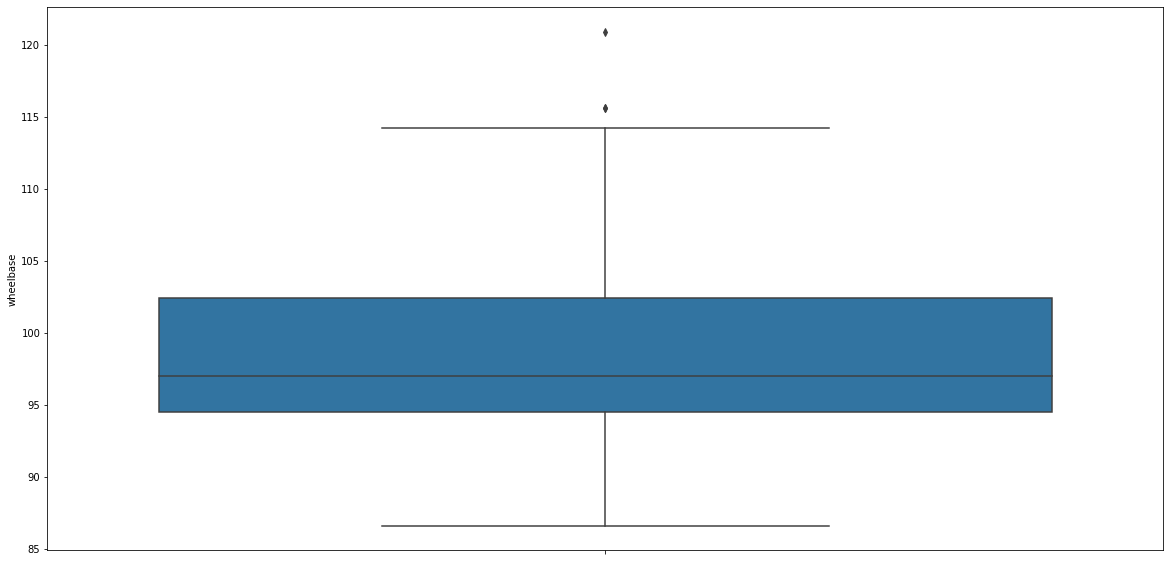

In [19]:
plt.figure(figsize=(20,10))
sns.boxplot(carprice["wheelbase"],orient="v")

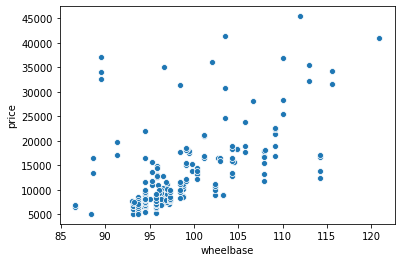

In [20]:
#Around points seem out of bounds. Let's check the scatter plot with price
sns.scatterplot(carprice["wheelbase"],carprice["price"])

As we can see, wheelbase value of around 115 isn't explained by the price or is nowhere correlated. So, there are chances that these can be outliers.

In [21]:
report_outlier_values("wheelbase")

70    115.6
71    115.6
73    120.9
Name: wheelbase, dtype: float64

In [22]:
#sns.scatterplot(carprice["wheelbase"],carprice["price"])

In [23]:
carprice_numeric.columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### Carlength

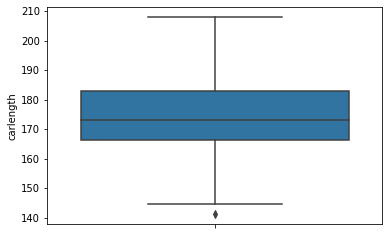

In [24]:
sns.boxplot(carprice['carlength'],orient="v")

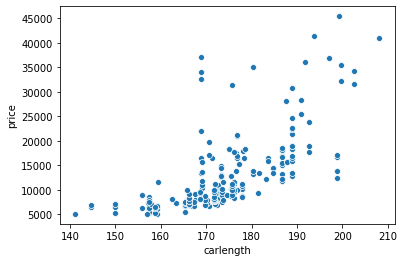

In [25]:
#As we can see around one-two datapoints are out of bounds. lets now check the scatterplot
sns.scatterplot(carprice["carlength"],carprice["price"])

Though the boxplot now shows that there are two points outside the quantile ranges < 1.5Q1, the scatterplot shows that price and carlength are related for all values and there's not so much of a deviation. So, not removing the outliers in this case, may not affect the model built with price as the primary output. Anyway let's just report the outliers

In [26]:
report_outlier_values('carlength')

18    141.1
Name: carlength, dtype: float64

### Carwidth

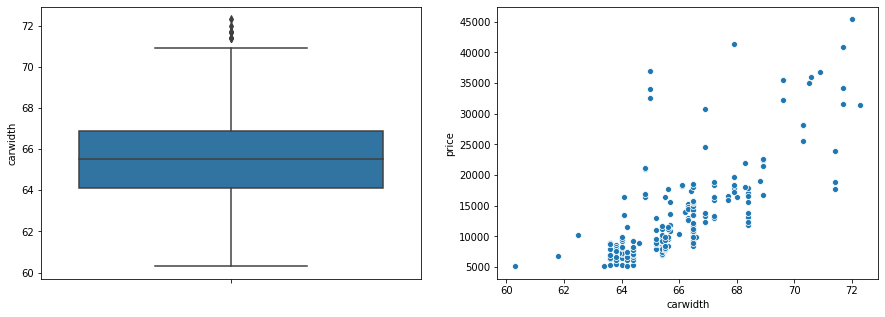

In [27]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(carprice['carwidth'],orient="v")
plt.subplot(1,2,2)
sns.scatterplot(carprice["carwidth"],carprice["price"])
plt.show()

The scatterplot shows most of the values in range 62-68 explaining the price. Values beyond 70 don't show any relation to the price.Also, from the boxplot it's clear that there are few points outside the quartile range. So, let's check these outlier values

In [28]:
report_outlier_values('carwidth')

6      71.4
7      71.4
8      71.4
70     71.7
71     71.7
73     71.7
74     72.0
129    72.3
Name: carwidth, dtype: float64

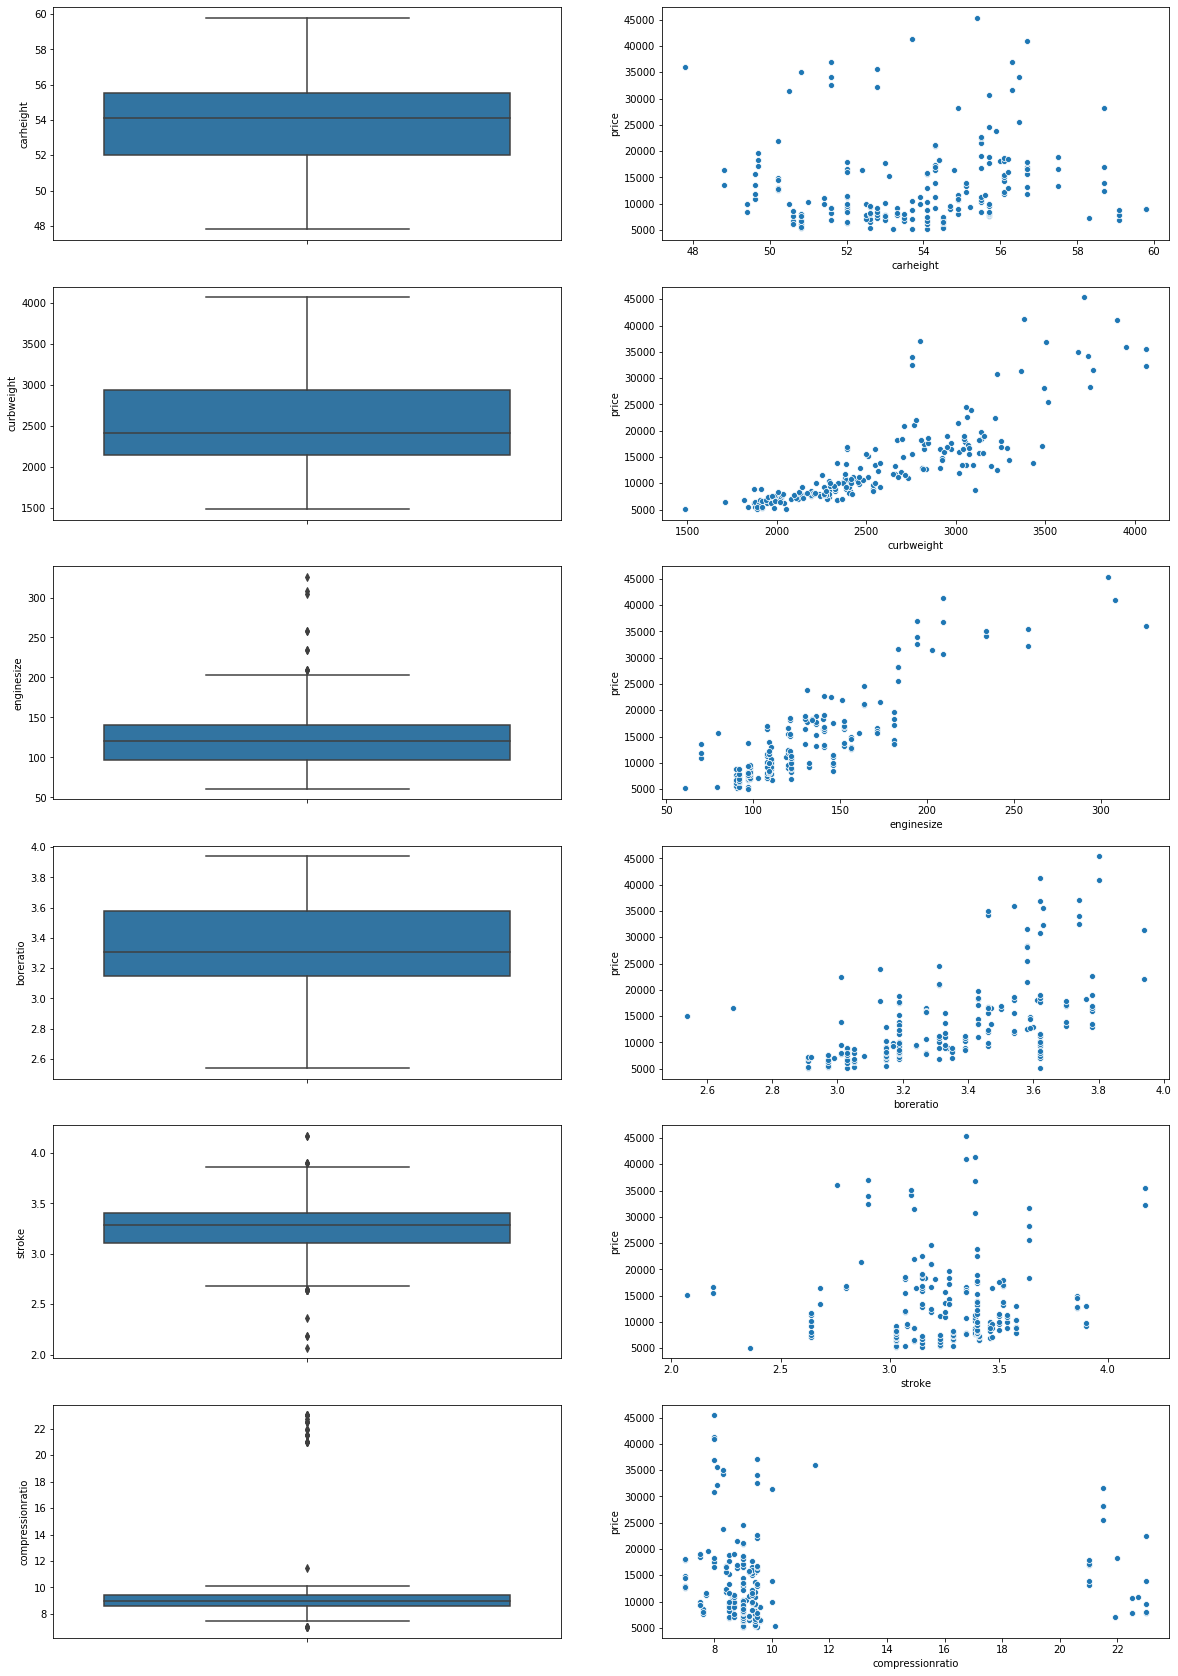

In [29]:
plt.figure(figsize=(20,30))
plt.subplot(6,2,1)
sns.boxplot(carprice['carheight'],orient="v")
plt.subplot(6,2,2)
sns.scatterplot(carprice["carheight"],carprice["price"])
plt.subplot(6,2,3)
sns.boxplot(carprice['curbweight'],orient="v")
plt.subplot(6,2,4)
sns.scatterplot(carprice["curbweight"],carprice["price"])
plt.subplot(6,2,5)
sns.boxplot(carprice['enginesize'],orient="v")
plt.subplot(6,2,6)
sns.scatterplot(carprice["enginesize"],carprice["price"])
plt.subplot(6,2,7)
sns.boxplot(carprice['boreratio'],orient="v")
plt.subplot(6,2,8)
sns.scatterplot(carprice["boreratio"],carprice["price"])
plt.subplot(6,2,9)
sns.boxplot(carprice['stroke'],orient="v")
plt.subplot(6,2,10)
sns.scatterplot(carprice["stroke"],carprice["price"])
plt.subplot(6,2,11)
sns.boxplot(carprice['compressionratio'],orient="v")
plt.subplot(6,2,12)
sns.scatterplot(carprice["compressionratio"],carprice["price"])
plt.show()

As is clear from the boxplots, only the columns enginesize,stroke and compressionratio have huge number of values out of bounds.
However the variables stroke and compressionratio are not really correlated strongly with price. Therefore there isn't a necessity
to treat outlier values for these variables as the model wont be affected. However as the dataset we have is small, we wont be treating 
outliers for any of the variables and instead just report them.

In [30]:
report_outlier_values('enginesize')
#We can see there are 10 outlier values for enginesize in total

15    209
16    209
17    209
47    258
48    258
49    326
71    234
72    234
73    308
74    304
Name: enginesize, dtype: int64

In [31]:
report_outlier_values('stroke')
# we Can see there are 20 outlier values in total for this column

29     3.90
47     4.17
48     4.17
111    2.19
113    2.19
130    3.90
131    3.90
134    2.07
138    2.36
139    2.64
140    2.64
141    2.64
142    2.64
143    2.64
144    2.64
145    2.64
146    2.64
147    2.64
148    2.64
149    2.64
Name: stroke, dtype: float64

In [32]:
report_outlier_values('compressionratio')
# There are a total of 28 values(>1/10th of data) in the column 'compressionratio' which are in the rows as mentioned below
#So it's better even while treating them not to remove them or remove only the extreme values if they affect in model building

9       7.0
29      7.0
49     11.5
63     22.7
66     22.0
67     21.5
68     21.5
69     21.5
70     21.5
82      7.0
83      7.0
84      7.0
90     21.9
108    21.0
110    21.0
112    21.0
114    21.0
116    21.0
117     7.0
124     7.0
158    22.5
159    22.5
174    22.5
182    23.0
184    23.0
187    23.0
192    23.0
203    23.0
Name: compressionratio, dtype: float64

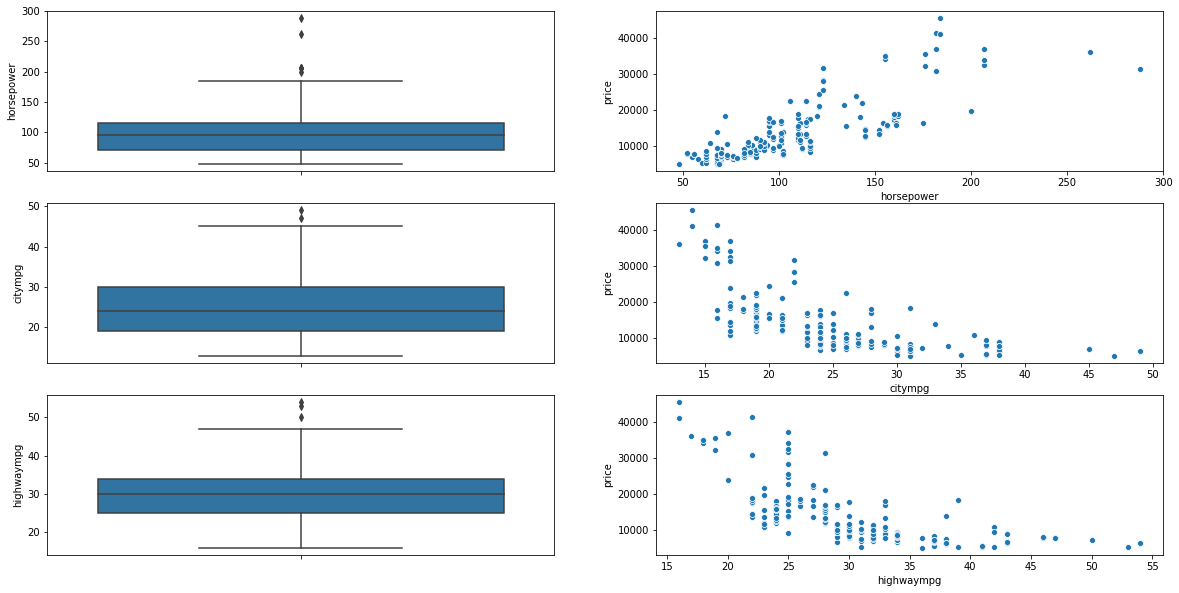

In [33]:
plt.figure(figsize=(20,10))
plt.subplot(3,2,1)
sns.boxplot(carprice['horsepower'],orient="v")
plt.subplot(3,2,2)
sns.scatterplot(carprice["horsepower"],carprice["price"])
plt.subplot(3,2,3)
sns.boxplot(carprice['citympg'],orient="v")
plt.subplot(3,2,4)
sns.scatterplot(carprice["citympg"],carprice["price"])
plt.subplot(3,2,5)
sns.boxplot(carprice['highwaympg'],orient="v")
plt.subplot(3,2,6)
sns.scatterplot(carprice["highwaympg"],carprice["price"])
plt.show()

Its clear from the scatterplot that "horsepower" has outliers in the righter extrreme, similarly so is it for "citympg" in the range 45-50. For the column "highwaympg", its the same as citympg. Outliers in the range 50-55

In [34]:
report_outlier_values('citympg')

18    47
30    49
Name: citympg, dtype: int64

In [35]:
report_outlier_values('highwaympg')

18    53
30    54
90    50
Name: highwaympg, dtype: int64

In [36]:
report_outlier_values('horsepower')

49     262
105    200
126    207
127    207
128    207
129    288
Name: horsepower, dtype: int64

## Visualizing categorical variables

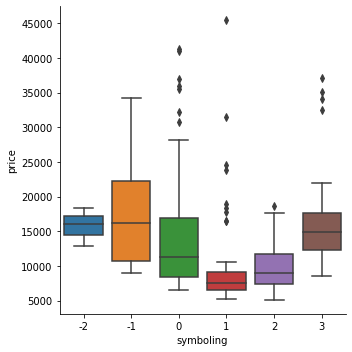

In [37]:

sns.catplot(x='symboling', y='price',kind="box", data=carprice)

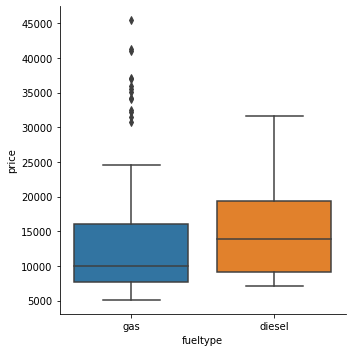

In [38]:
sns.catplot(x='fueltype', y='price',kind="box", data=carprice)

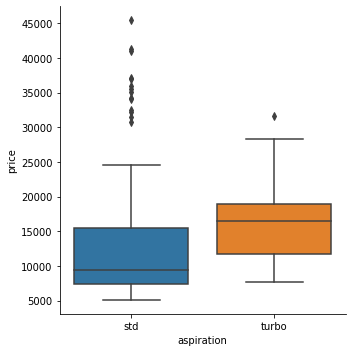

In [39]:
sns.catplot(x='aspiration', y='price',kind="box", data=carprice)

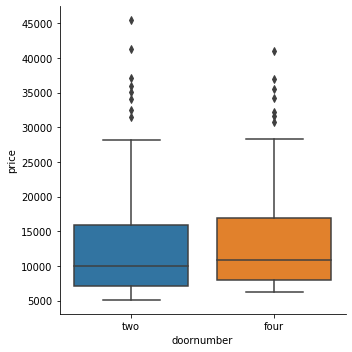

In [40]:
sns.catplot(x='doornumber', y='price',kind="box", data=carprice)

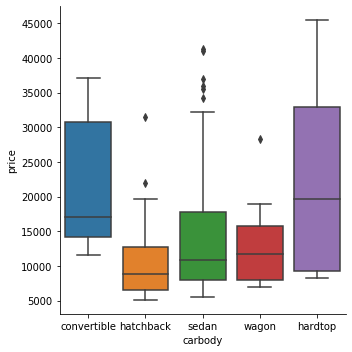

In [41]:
sns.catplot(x='carbody', y='price',kind="box", data=carprice)

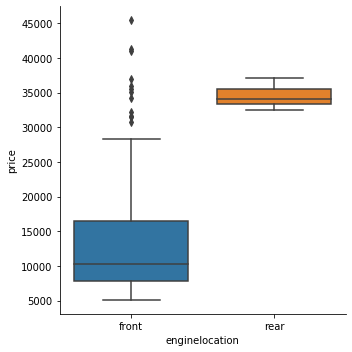

In [42]:
sns.catplot(x='enginelocation', y='price',kind="box", data=carprice)

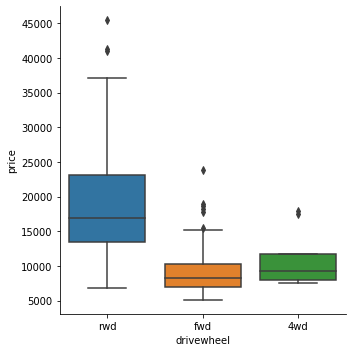

In [43]:
sns.catplot(x='drivewheel', y='price',kind="box", data=carprice)

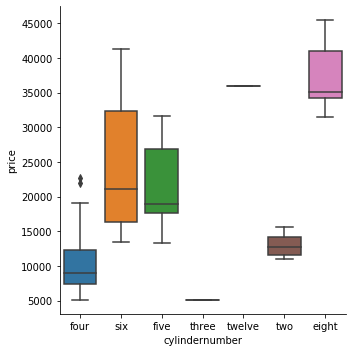

In [44]:
sns.catplot(x='cylindernumber', y='price',kind="box", data=carprice)

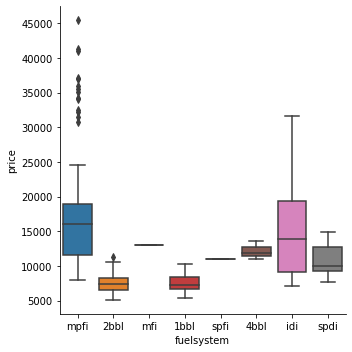

In [45]:
sns.catplot(x='fuelsystem', y='price',kind="box", data=carprice)
plt.show()

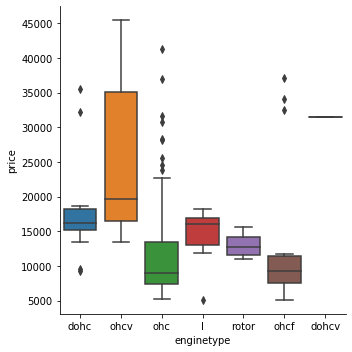

In [46]:
sns.catplot(x='enginetype', y='price',kind="box", data=carprice)

***From this we can see that doornumber variable doesn't affect the price so much. So we can drop it. Also, as symboling is an ordered categorical variable, with -3 being the best and +3 being the risky, the median of prices for each of these should also follow a pattern, either increasing or decreasing. As it doesn't, we can drop it too***

# DATA PREPARATION

### Variable Derivation

We see an uncanny resemblance between the graphs of citympg with price and highway mpg with price.
Let's plot the graph of citympg with highway mpg

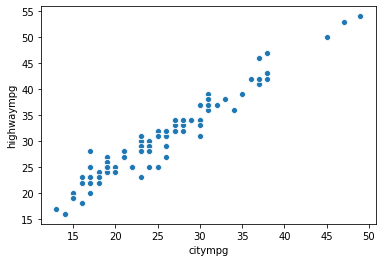

In [47]:
sns.scatterplot(carprice["citympg"],carprice["highwaympg"])

We can see almost a straight line in this graph. This can be expected because if the mileage of the car is higher in the city, it is higher on the highway as well. Anyway let's check the correlation coefficient.

In [48]:
np.corrcoef(carprice['citympg'],carprice['highwaympg'])

array([[1.        , 0.97133704],
       [0.97133704, 1.        ]])

The correlation is huge. Around 97%. So, instead of using these two variables in the model, let's create a variable that takes effects of
each of these variables and use it in the model instead.

In [49]:
carprice["avgmileage"]=0.5*carprice["citympg"]+0.5*carprice["highwaympg"]

In [50]:
#Now lets drop the columns citympg and highwaympg
carprice.drop(["citympg","highwaympg"],inplace=True, axis=1)

In [51]:
carprice_numeric= carprice.select_dtypes(include=("float64","int64"))

### Creating dummies for categorical variable

In [52]:
#Dropping the categorical variables as discussed above.
carprice= carprice. drop(["symboling","doornumber"],axis=1)

In [53]:
carprice_categorical=carprice.select_dtypes(include="object")

In [54]:
carprice_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
fueltype          205 non-null object
aspiration        205 non-null object
carbody           205 non-null object
drivewheel        205 non-null object
enginelocation    205 non-null object
enginetype        205 non-null object
cylindernumber    205 non-null object
fuelsystem        205 non-null object
CompanyName       205 non-null object
dtypes: object(9)
memory usage: 14.5+ KB


In [55]:
dummies_data=pd.get_dummies(carprice_categorical,drop_first=True)

In [56]:
carprice=carprice.drop(list(carprice_categorical.columns), axis=1)

In [57]:
carprice=pd.concat([carprice,dummies_data],axis=1)

In [58]:
carprice.head()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo
0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
1,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
2,3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,0,0,0
3,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,0,0,0
4,5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,0,0,0


### Data split into test and train

In [59]:
#Dropping car_ID column before model building as it is of no significance
carprice=carprice.drop(["car_ID"],axis=1)
from sklearn.model_selection import train_test_split
np.random.seed(1)
carprice_train,carprice_test=train_test_split(carprice,train_size=0.7,test_size=0.3, random_state=100)

In [60]:
carprice_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo
122,93.7,167.3,63.8,50.8,2191,98,2.97,3.23,9.4,68,...,0,0,1,0,0,0,0,0,0,0
125,94.5,168.9,68.3,50.2,2778,151,3.94,3.11,9.5,143,...,0,0,0,1,0,0,0,0,0,0
166,94.5,168.7,64.0,52.6,2300,98,3.24,3.08,9.4,112,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
199,104.3,188.8,67.2,57.5,3157,130,3.62,3.15,7.5,162,...,0,0,0,0,0,0,0,0,0,1


### Standardization of the training dataset

In [61]:
from sklearn import preprocessing
# We know that in standardization the dummy values created for categorical variables will also change. 
#So we have to only standardize the numeric columns
col_names=carprice_numeric.drop(["car_ID"],axis=1).columns
#carprice_numeric was the variable which we had created before, but we dropped the car_ID and we know that symboling is actually
#a categorical variable. Therefore removing that


In [62]:
col_names

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'price', 'avgmileage'],
      dtype='object')

In [63]:
scaler=preprocessing.StandardScaler()
carprice_train[col_names]=scaler.fit_transform(carprice_train[col_names])


C:\Users\aishwarya.kuzhikkat\AppData\Local\Continuum\Python_anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\aishwarya.kuzhikkat\AppData\Local\Continuum\Python_anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [64]:
carprice_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo
122,-0.811836,-0.487238,-0.924500,-1.134628,-0.642128,-0.660242,-1.297329,-0.064443,-0.172569,-0.872898,...,0,0,1,0,0,0,0,0,0,0
125,-0.677177,-0.359789,1.114978,-1.382026,0.439415,0.637806,2.432256,-0.449757,-0.146125,1.021826,...,0,0,0,1,0,0,0,0,0,0
166,-0.677177,-0.375720,-0.833856,-0.392434,-0.441296,-0.660242,-0.259197,-0.546085,-0.172569,0.238673,...,0,0,0,0,0,0,0,1,0,0
1,-1.670284,-0.367754,-0.788535,-1.959288,0.015642,0.123485,0.625138,-1.830463,-0.278345,0.213410,...,0,0,0,0,0,0,0,0,0,0
199,0.972390,1.225364,0.616439,1.627983,1.137720,0.123485,1.201877,-0.321319,-0.675002,1.501822,...,0,0,0,0,0,0,0,0,0,1


# MODEL BUILDING

In [65]:
# Dividing data into dependent and independent variables
y_train=carprice_train.pop('price')
x_train=carprice_train

In [66]:
import statsmodels.api as sm
x_train_sm=sm.add_constant(x_train)
lr=sm.OLS(y_train,x_train_sm)
model=lr.fit()
model.summary()

C:\Users\aishwarya.kuzhikkat\AppData\Local\Continuum\Python_anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     61.74
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           6.44e-52
Time:                        22:19:16   Log-Likelihood:                 58.829
No. Observations:                 143   AIC:                            -7.659
Df Residuals:                      88   BIC:                             155.3
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.5180      0.686     -0.755      0.452      -1.881       0.845
wheelbase                  0.2388      0.085      2.821      0.006       0.071       0.407
carlength                 -0.1639      0.094     -1.743      0.085      -0.351       0.023
carwidth                   0.2217      0.083      2.656      0.009       0.056       0.388
carheight                 -0.1784      0.052     -3.429      0.001      -0.282      -0.075
curbweight                 0.3421      0.126      2.719      0.008       0.092       0.592
enginesize                 1.3125      0.312      4.203      0.000       0.692       1.933
boreratio                 -0.5422      0.154     -3.515      0.001      -0.849      -0.236
stroke                    -0.1233      0.060     -2.065      0.042      -0.242      -0.005
compressionratio          -0.3990      0.294     -1.359      0.178      -0.983       0.185
horsepower                -0.1161      0.155     -0.747      0.457      -0.425       0.193
peakrpm                    0.1607      0.045      3.573      0.001       0.071       0.250
avgmileage                 0.0726      0.073      1.000      0.320      -0.072       0.217
fueltype_gas              -0.8708      0.494     -1.761      0.082      -1.853       0.112
aspiration_turbo           0.3430      0.132      2.602      0.011       0.081       0.605
carbody_hardtop           -0.4485      0.262     -1.712      0.090      -0.969       0.072
carbody_hatchback         -0.4839      0.203     -2.384      0.019      -0.887      -0.080
carbody_sedan             -0.3468      0.212     -1.632      0.106      -0.769       0.075
carbody_wagon             -0.2606      0.228     -1.143      0.256      -0.714       0.193
drivewheel_fwd            -0.0085      0.112     -0.076      0.939      -0.230       0.213
drivewheel_rwd             0.0871      0.152      0.572      0.569      -0.216       0.390
enginelocation_rear        1.0033      0.308      3.256      0.002       0.391       1.616
enginetype_dohcv           0.9715      0.766      1.269      0.208      -0.550       2.493
enginetype_l               0.8655      0.368      2.349      0.021       0.133       1.598
enginetype_ohc             0.0421      0.200      0.211      0.834      -0.355       0.439
enginetype_ohcf            0.7474      0.187      4.002      0.000       0.376       1.118
enginetype_ohcv           -0.0882      0.176     -0.500      0.619      -0.439       0.263
enginetype_rotor           1.6952      0.516      3.284      0.001       0.669       2.721
cylindernumber_five        1.0873      0.640      1.700      0.093      -0.184       2.359
cylindernumber_four        1.8138      0.825      2.199      0.030       0.175       3.453
cylindernumber_six         0.4558      0.466      0.978      0.331      -0.471  

From this summary, it's clear that there are many variables with p>0.05 and might be insignificant. Including all the variables might be good on train data with the R2 going high but it'll definitely overfit test data , decreasing the R2 score. So, we should attempt to keep enough variables in the data so that the model doesn't underfit or overfit and is able to predict atleast upto 85% of test data

###  Recursive Feature Elimination- Automated Tuning

In [67]:
# Initially as the number of variables used in model building is quite high (68), manual tuning would be difficult.
# So we'll perform recursive feature elimination and select upto 10 variables from which we will perform a manual tuning to bring down
#the features and get the best fit
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)
rfe=RFE(lm,10)
rfe=rfe.fit(x_train,y_train)

In [68]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 28),
 ('carlength', False, 27),
 ('carwidth', False, 13),
 ('carheight', False, 25),
 ('curbweight', False, 17),
 ('enginesize', True, 1),
 ('boreratio', False, 9),
 ('stroke', False, 16),
 ('compressionratio', False, 24),
 ('horsepower', False, 39),
 ('peakrpm', False, 36),
 ('avgmileage', False, 42),
 ('fueltype_gas', False, 23),
 ('aspiration_turbo', False, 11),
 ('carbody_hardtop', False, 30),
 ('carbody_hatchback', False, 21),
 ('carbody_sedan', False, 31),
 ('carbody_wagon', False, 32),
 ('drivewheel_fwd', False, 46),
 ('drivewheel_rwd', False, 40),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohcv', False, 4),
 ('enginetype_l', False, 3),
 ('enginetype_ohc', False, 43),
 ('enginetype_ohcf', False, 8),
 ('enginetype_ohcv', False, 37),
 ('enginetype_rotor', True, 1),
 ('cylindernumber_five', False, 5),
 ('cylindernumber_four', False, 7),
 ('cylindernumber_six', False, 15),
 ('cylindernumber_three', False, 6),
 ('cylindernumber_twelve', False, 2),
 ('cyli

In [69]:
x_train.columns[rfe.support_]

Index(['enginesize', 'enginelocation_rear', 'enginetype_rotor',
       'cylindernumber_two', 'CompanyName_audi', 'CompanyName_bmw',
       'CompanyName_buick', 'CompanyName_porsche', 'CompanyName_saab',
       'CompanyName_volvo'],
      dtype='object')

In [70]:
#Building model using stats for detailed data
x_train_rfe=x_train[x_train.columns[rfe.support_]]

In [71]:
x_train_rfe_sm=sm.add_constant(x_train_rfe)
lr=sm.OLS(y_train,x_train_rfe_sm)
model=lr.fit()
model.summary()

C:\Users\aishwarya.kuzhikkat\AppData\Local\Continuum\Python_anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     141.3
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.39e-63
Time:                        22:19:16   Log-Likelihood:                -34.380
No. Observations:                 143   AIC:                             88.76
Df Residuals:                     133   BIC:                             118.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2121      0.031     -6.889      0.000      -0.273      -0.151
enginesize              0.7221      0.032     22.586      0.000       0.659       0.785
enginelocation_rear     0.6401      0.391      1.637      0.104      -0.133       1.414
enginetype_rotor        0.5675      0.083      6.828      0.000       0.403       0.732
cylindernumber_two      0.5675      0.083      6.828      0.000       0.403       0.732
CompanyName_audi        0.7427      0.146      5.073      0.000       0.453       1.032
CompanyName_bmw         1.1980      0.140      8.573      0.000       0.922       1.474
CompanyName_buick       1.1221      0.160      6.992      0.000       0.805       1.440
CompanyName_porsche     1.0467      0.232      4.506      0.000       0.587       1.506
CompanyName_saab        0.5739      0.187      3.074      0.003       0.205       0.943
CompanyName_volvo       0.6284      0.135      4.640      0.000       0.361       0.896
==============================================================================
Omnibus:                       16.950   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.386
Skew:                           0.664   Prob(JB):                     8.35e-06
Kurtosis:                       4.471   Cond. No.                     3.99e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.12e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Only the variable enginelocation_rear has a p value >0.05. Now let's check the variance inflation factor

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

C:\Users\aishwarya.kuzhikkat\AppData\Local\Continuum\Python_anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [73]:
vif

,Features,VIF
2,enginetype_rotor,inf
3,cylindernumber_two,inf
7,CompanyName_porsche,1.55
1,enginelocation_rear,1.50
0,enginesize,1.39
6,CompanyName_buick,1.18
5,CompanyName_bmw,1.07
9,CompanyName_volvo,1.01
4,CompanyName_audi,1.00
8,CompanyName_saab,1.00


The variance inflation factor is infinity for two variables- cylindernumber_two and enginetype_rotor. This implies they must be 100% correlated. So, let's drop one of the variables and check the Variance inflation factor and the p-values.

In [74]:
x_train_rfe2=x_train_rfe.drop(["cylindernumber_two"],axis=1)
x_train_rfe2_sm=sm.add_constant(x_train_rfe2)
lr=sm.OLS(y_train,x_train_rfe2_sm)
model=lr.fit()
model.summary()

C:\Users\aishwarya.kuzhikkat\AppData\Local\Continuum\Python_anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     141.3
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.39e-63
Time:                        22:19:16   Log-Likelihood:                -34.380
No. Observations:                 143   AIC:                             88.76
Df Residuals:                     133   BIC:                             118.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2121      0.031     -6.889      0.000      -0.273      -0.151
enginesize              0.7221      0.032     22.586      0.000       0.659       0.785
enginelocation_rear     0.6401      0.391      1.637      0.104      -0.133       1.414
enginetype_rotor        1.1351      0.166      6.828      0.000       0.806       1.464
CompanyName_audi        0.7427      0.146      5.073      0.000       0.453       1.032
CompanyName_bmw         1.1980      0.140      8.573      0.000       0.922       1.474
CompanyName_buick       1.1221      0.160      6.992      0.000       0.805       1.440
CompanyName_porsche     1.0467      0.232      4.506      0.000       0.587       1.506
CompanyName_saab        0.5739      0.187      3.074      0.003       0.205       0.943
CompanyName_volvo       0.6284      0.135      4.640      0.000       0.361       0.896
==============================================================================
Omnibus:                       16.950   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.386
Skew:                           0.664   Prob(JB):                     8.35e-06
Kurtosis:                       4.471   Cond. No.                         15.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now we see that engine location rear still has higher p value. Let's check the variance inflation factor

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Features'] = x_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe2.values, i) for i in range(x_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)


In [76]:
vif

,Features,VIF
6,CompanyName_porsche,1.55
1,enginelocation_rear,1.50
0,enginesize,1.39
5,CompanyName_buick,1.18
4,CompanyName_bmw,1.07
2,enginetype_rotor,1.06
8,CompanyName_volvo,1.01
3,CompanyName_audi,1.00
7,CompanyName_saab,1.00


None of the VIFs are greater than 5, so we can safely assume that they're not correlated. Now lets drop enginelocation_rear as it has higher p- value

#### Model number 3

In [77]:
x_train3=x_train_rfe2.drop("enginelocation_rear",axis=1)
#Checking the VIF after dropping this variable
vif=pd.DataFrame()
vif['Features'] = x_train3.columns
vif['VIF'] = [variance_inflation_factor(x_train3.values, i) for i in range(x_train3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,1.39
4,CompanyName_buick,1.18
3,CompanyName_bmw,1.07
1,enginetype_rotor,1.06
5,CompanyName_porsche,1.06
7,CompanyName_volvo,1.01
2,CompanyName_audi,1.00
6,CompanyName_saab,1.00


In [78]:
#Now we see that all VIFs are less than 5. Let's check the model p-values now.
x_train3_sm=sm.add_constant(x_train3)
lr=sm.OLS(y_train,x_train3_sm)
model=lr.fit()
model.summary()

C:\Users\aishwarya.kuzhikkat\AppData\Local\Continuum\Python_anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     156.6
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           4.02e-64
Time:                        22:19:16   Log-Likelihood:                -35.806
No. Observations:                 143   AIC:                             89.61
Df Residuals:                     134   BIC:                             116.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2118      0.031     -6.837      0.000      -0.273      -0.150
enginesize              0.7238      0.032     22.514      0.000       0.660       0.787
enginetype_rotor        1.1370      0.167      6.797      0.000       0.806       1.468
CompanyName_audi        0.7420      0.147      5.036      0.000       0.451       1.033
CompanyName_bmw         1.1957      0.141      8.504      0.000       0.918       1.474
CompanyName_buick       1.1184      0.161      6.926      0.000       0.799       1.438
CompanyName_porsche     1.2572      0.195      6.459      0.000       0.872       1.642
CompanyName_saab        0.5737      0.188      3.054      0.003       0.202       0.945
CompanyName_volvo       0.6272      0.136      4.603      0.000       0.358       0.897
==============================================================================
Omnibus:                       15.610   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.300
Skew:                           0.644   Prob(JB):                     3.91e-05
Kurtosis:                       4.322   Cond. No.                         7.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The p-values and VIFs are both low, so we can now assume that we have reached our final model. Also, the adjusted R2 score is 90%, which is a good indication of variance explanation

Next step is to check if the model we obtained is good by testing the residuals


## Residual Analysis

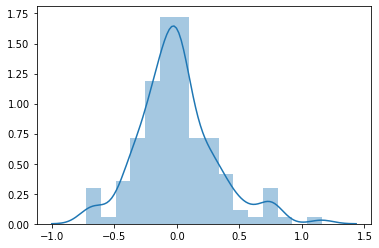

In [79]:
#Calculating the predicted value of y
y_train_pred=model.predict(x_train3_sm)
res=y_train-y_train_pred
sns.distplot(res)

Text(0, 0.5, 'Price')

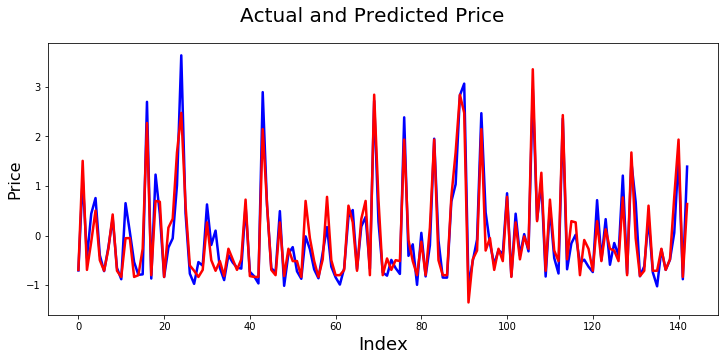

In [80]:
#Actual vs Predicted
c = [i for i in range(143,)]
fig = plt.figure(figsize=(12,5))
plt.plot(c,y_train, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_train_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted Price', fontsize=20)         # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Price', fontsize=16)                               # Y-label

Text(0, 0.5, 'Residuals')

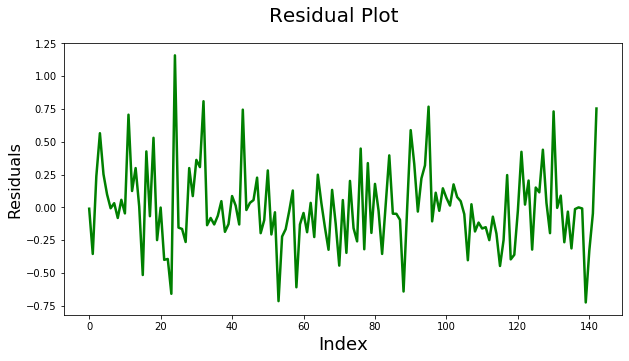

In [81]:
# Error terms
c = [i for i in range(143,)]
fig = plt.figure(figsize=(10,5))
plt.plot(c,y_train-y_train_pred, color="green", linewidth=2.5, linestyle="-")
fig.suptitle('Residual Plot', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Residuals', fontsize=16)                # Y-label

It's clear from the graphs that the residual mean is zero and the residuals do not follow any particular pattern.So we can go ahead and use this model for prediction on the test_set

## Model evaluation

In [82]:
#Scaling the test set
carprice_test[col_names]=scaler.transform(carprice_test[col_names])

import warnings as warnings
warnings.filterwarnings('ignore')

C:\Users\aishwarya.kuzhikkat\AppData\Local\Continuum\Python_anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\aishwarya.kuzhikkat\AppData\Local\Continuum\Python_anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [83]:
#Dividing into x and y
y_test= carprice_test.pop('price')
x_test=carprice_test

In [84]:
carprice_test.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.129960,0.166583,0.101818,0.236036,0.097811,0.157852,0.284055,0.056744,0.078647,0.130694,...,0.064516,0.048387,0.048387,0.032258,0.0,0.048387,0.016129,0.193548,0.080645,0.080645
std,1.039056,0.930519,0.899764,1.005537,0.852557,1.056741,1.106915,1.021918,1.157987,0.990569,...,0.247676,0.216335,0.216335,0.178127,0.0,0.216335,0.127000,0.398304,0.274512,0.274512
min,-2.006930,-2.295427,-1.513682,-1.711890,-1.327536,-1.125581,-2.950650,-3.789140,-0.807222,-1.277105,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.475189,-0.323943,-0.561926,-0.577983,-0.487359,-0.415328,-0.451443,-0.321319,-0.410564,-0.727636,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.113294,0.110181,-0.108709,0.370376,-0.008311,-0.096938,0.317543,0.320870,-0.278345,-0.051851,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.778818,0.952543,0.299187,0.885789,0.745730,0.484734,1.201877,0.674074,-0.172569,0.415514,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.766554,2.762723,2.791881,2.576342,2.506693,4.482969,1.893965,2.086890,3.423794,2.638656,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
#Adding a constant
x_test_sm= sm.add_constant(x_test)
#Dropping variables which aren't in final x_train3
x_test_drop=x_test_sm[x_train3_sm.columns]

In [86]:
x_test_drop.head()

,const,enginesize,enginetype_rotor,CompanyName_audi,CompanyName_bmw,CompanyName_buick,CompanyName_porsche,CompanyName_saab,CompanyName_volvo
160,1.0,-0.660242,0,0,0,0,0,0,0
186,1.0,-0.390836,0,0,0,0,0,0,0
59,1.0,-0.072447,0,0,0,0,0,0,0
165,1.0,-0.660242,0,0,0,0,0,0,0
140,1.0,-0.415328,0,0,0,0,0,0,0


In [87]:
#Predict y_test
y_test_pred=model.predict(x_test_drop)

In [88]:
#Evaluating the model
from sklearn.metrics import r2_score
r2_score(y_true=y_test,y_pred=y_test_pred)

0.9053256288000193

The model built on the training set explains around 90.5% variance in the test set as compared to 90% on the training set.
So the model constructed is a good model and observations can be made based on this model.

## Observations

In [89]:
model.params


const                 -0.211756
enginesize             0.723833
enginetype_rotor       1.137047
CompanyName_audi       0.742041
CompanyName_bmw        1.195741
CompanyName_buick      1.118376
CompanyName_porsche    1.257237
CompanyName_saab       0.573750
CompanyName_volvo      0.627246
dtype: float64

In [90]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     156.6
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           4.02e-64
Time:                        22:19:20   Log-Likelihood:                -35.806
No. Observations:                 143   AIC:                             89.61
Df Residuals:                     134   BIC:                             116.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2118      0.031     -6.837      0.000      -0.273      -0.150
enginesize              0.7238      0.032     22.514      0.000       0.660       0.787
enginetype_rotor        1.1370      0.167      6.797      0.000       0.806       1.468
CompanyName_audi        0.7420      0.147      5.036      0.000       0.451       1.033
CompanyName_bmw         1.1957      0.141      8.504      0.000       0.918       1.474
CompanyName_buick       1.1184      0.161      6.926      0.000       0.799       1.438
CompanyName_porsche     1.2572      0.195      6.459      0.000       0.872       1.642
CompanyName_saab        0.5737      0.188      3.054      0.003       0.202       0.945
CompanyName_volvo       0.6272      0.136      4.603      0.000       0.358       0.897
==============================================================================
Omnibus:                       15.610   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.300
Skew:                           0.644   Prob(JB):                     3.91e-05
Kurtosis:                       4.322   Cond. No.                         7.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model summary explanation:
   - It's clear from the final model summary above that the p-values are all really low and thus the coefficients of each of the variables considered in the model are significant
   - The probability of F-statistic of the model is quite low; indicating that the model is significant and is not built by chance.
   - The adjusted R2 score on training set is 90% whereas that on test- set is 90.5% which indicates a really good fit
   - The VIF values obtained above were all less than 5, indicating that no independent variable had strong correlations with the rest in the model building

##### Observations from the model:
* Cars of BMW, Buick and Porsche affect price the most. That is price is majorly determined in the US market depending on whether the car is manufactured by one of these companies or not
* The next determining factor is if the engine type is rotor, the price of the car is naturally high
* The enginesize is another determining factor. Previously before building the model, we observed that the carlength, carwidth,  horsepower are strongly correlated with the price. But upon careful analysis as below, we realize that they're all correlated to the enginesize strongly. That is correlation between
    - Carlength and Enginesize is 0.71
    - Carwidth and Enginesize is 0.75
    - Horsepower and Enginesize is 0.82
    - Curbweight and Enginesize is 0.86
    - Average mileage and Enginesize is -0.64
    
So, its no surprise that the model chose the feature enginesize that explains all the other features accurately into building the model for price prediction and discarded the rest


In [91]:
import numpy as np
np.corrcoef(carprice_train['curbweight'],carprice_train['enginesize'])

array([[1.        , 0.86510247],
       [0.86510247, 1.        ]])

## Price Equation

Therefore the equation of price is <br>
#### price= 1.26* CompanyName_porsche+ 1.12* CompanyName_buick+ 1.20 * CompanyName_bmw+ 1.13 * enginetype_rotor+ 0.62* CompanyName_volvo+ 0.74 * CompanyName_audi+ + 0.72 * enginesize+ 0.57 * CompanyName_saab-0.211

Please recall that we had scaled all the numeric variables before, so whenever I refer to a numeric variable such as price, it's the scaled value I'm talking about.

That is if a car is a BMW with a rotor as enginetype, the equation of price reduces to
 **price= 1.2 + 1.13 + 0.72 * enginesize- 0.211
      = 2.089 + 0.72*enginesize**

#### <font color="blue">Suggestions for Geely Auto:</font>

As the prices in the US market are larger affected by the company name of the Cars- BMW, Buick, Porsche, Audi, Volvo 
Geely Auto, a new car company to US should try manufacturing the cars of these brands initially!
Incase the cars of these brands cant be manufactured, Geely Auto when manufacturing a car of its own brand should keep competitive pricing with the rest of the companies like Mazda, Volkswagen, Mitsubishi, Toyota etc; in which the brand name doesn't determine the price. However, inorder to increase the prices, it can ensure that the enginetype used is rotor and the enginesize is maximised.

